In [2]:
# code to explore the tabular data in diamonds.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read in the data with headers
diamonds = pd.read_csv('diamonds.csv', index_col=0)

# check the data
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- recursively partitioning the input space
- one leaf per region
- inding the optimal partitioning of the data is NP-complete 
- The standard practice is to use a greedy procedure, in which we iteratively grow the tree one node at a time.
- This approach is used by CART, C4.5, and ID3
- multiway split may cause overfitting --> use binary splits 
- Gini index ( classification) - MSE loss (regression)
- no need to standardize the data 
- relatively robust to outliers.
- fast to fit, and scale well to large data sets.
- can handle missing input features
-  tree models also have some disadvantages. The primary one is that they do not predict
    very accurately compared to other kinds of model. This is in part due to the greedy nature of the
    tree construction algorithm.


'''
In averaging methods, the driving principle is to build several estimators independently and 
then to average their predictions. On average, the combined estimator is usually better than 
any of the single base estimator because its variance is reduced.
'''


# https://towardsdatascience.com/decision-tree-regressor-a-visual-guide-with-scikit-learn-2aa9e01f5d7f


/tmp/ipykernel_37178/2317530351.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds['price'], bins=20)


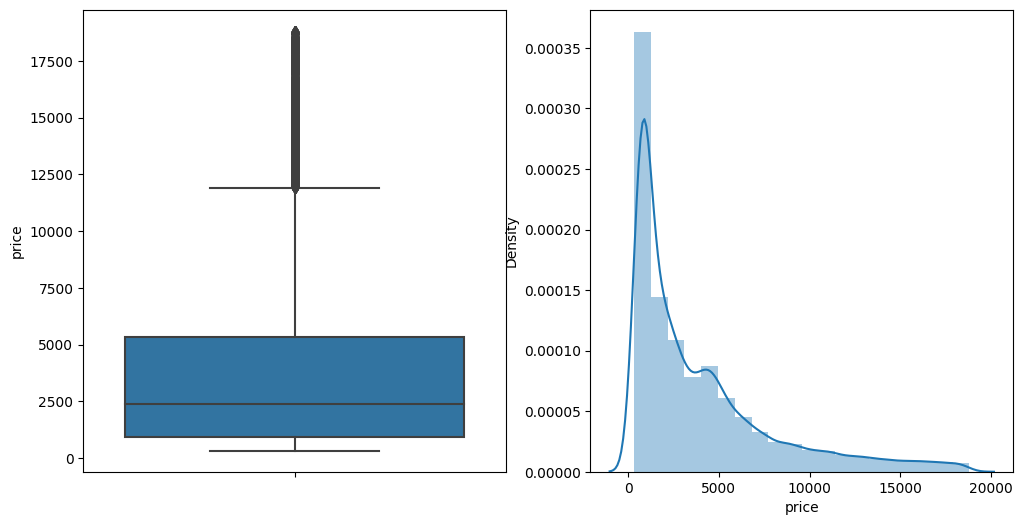

In [30]:
# check the data types
diamonds.dtypes
# check the shape of the data
diamonds.shape
# check for missing values
diamonds.isnull().sum()
# check for duplicates
diamonds.duplicated().sum()
# check for outliers in the categorical variables
diamonds.describe(include=['O'])
# check for outliers
diamonds.describe()
# check the distribution of the categorical variables
diamonds['cut'].value_counts() / len(diamonds)
diamonds['color'].value_counts() / len(diamonds)
diamonds['clarity'].value_counts() / len(diamonds)

# check the distribution of the target variable

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=diamonds['price'])
plt.subplot(1, 2, 2)
sns.distplot(diamonds['price'], bins=20)
plt.show()

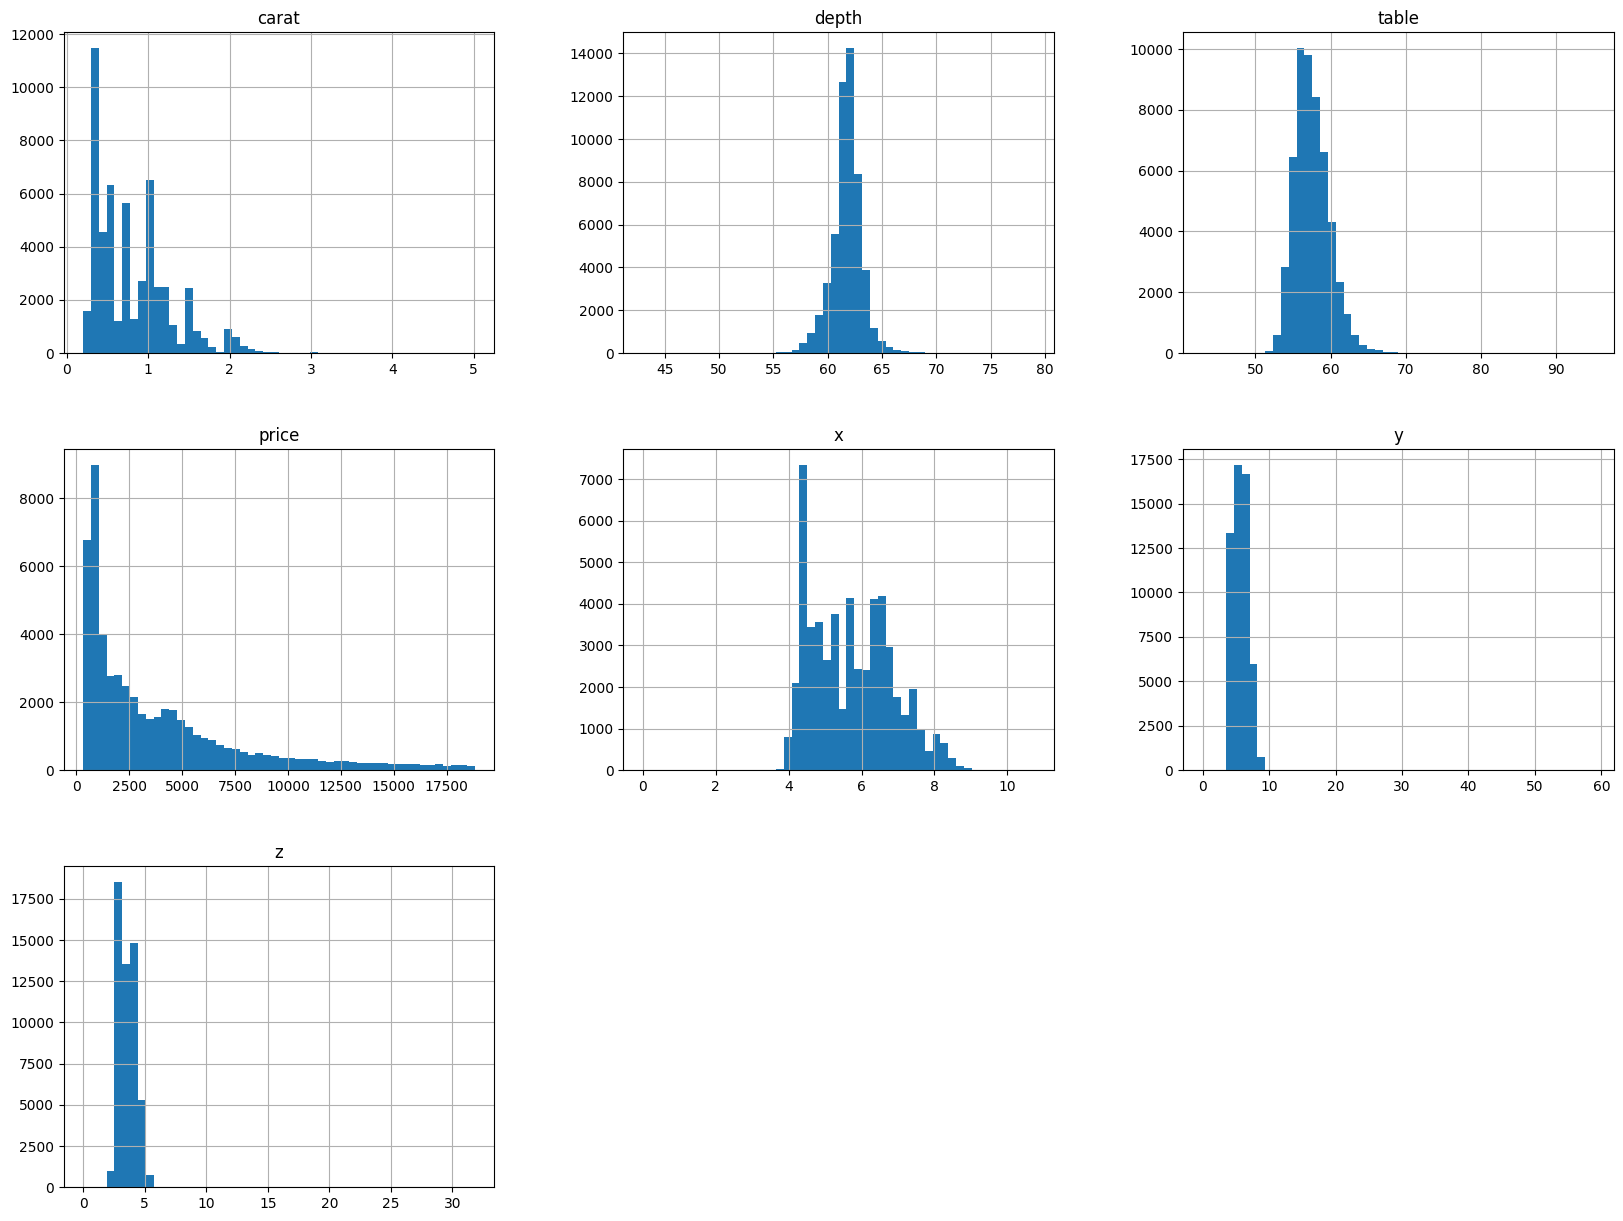

In [31]:
# check the distribution of the numerical variables

diamonds.hist(bins=50, figsize=(20, 15))
plt.show()

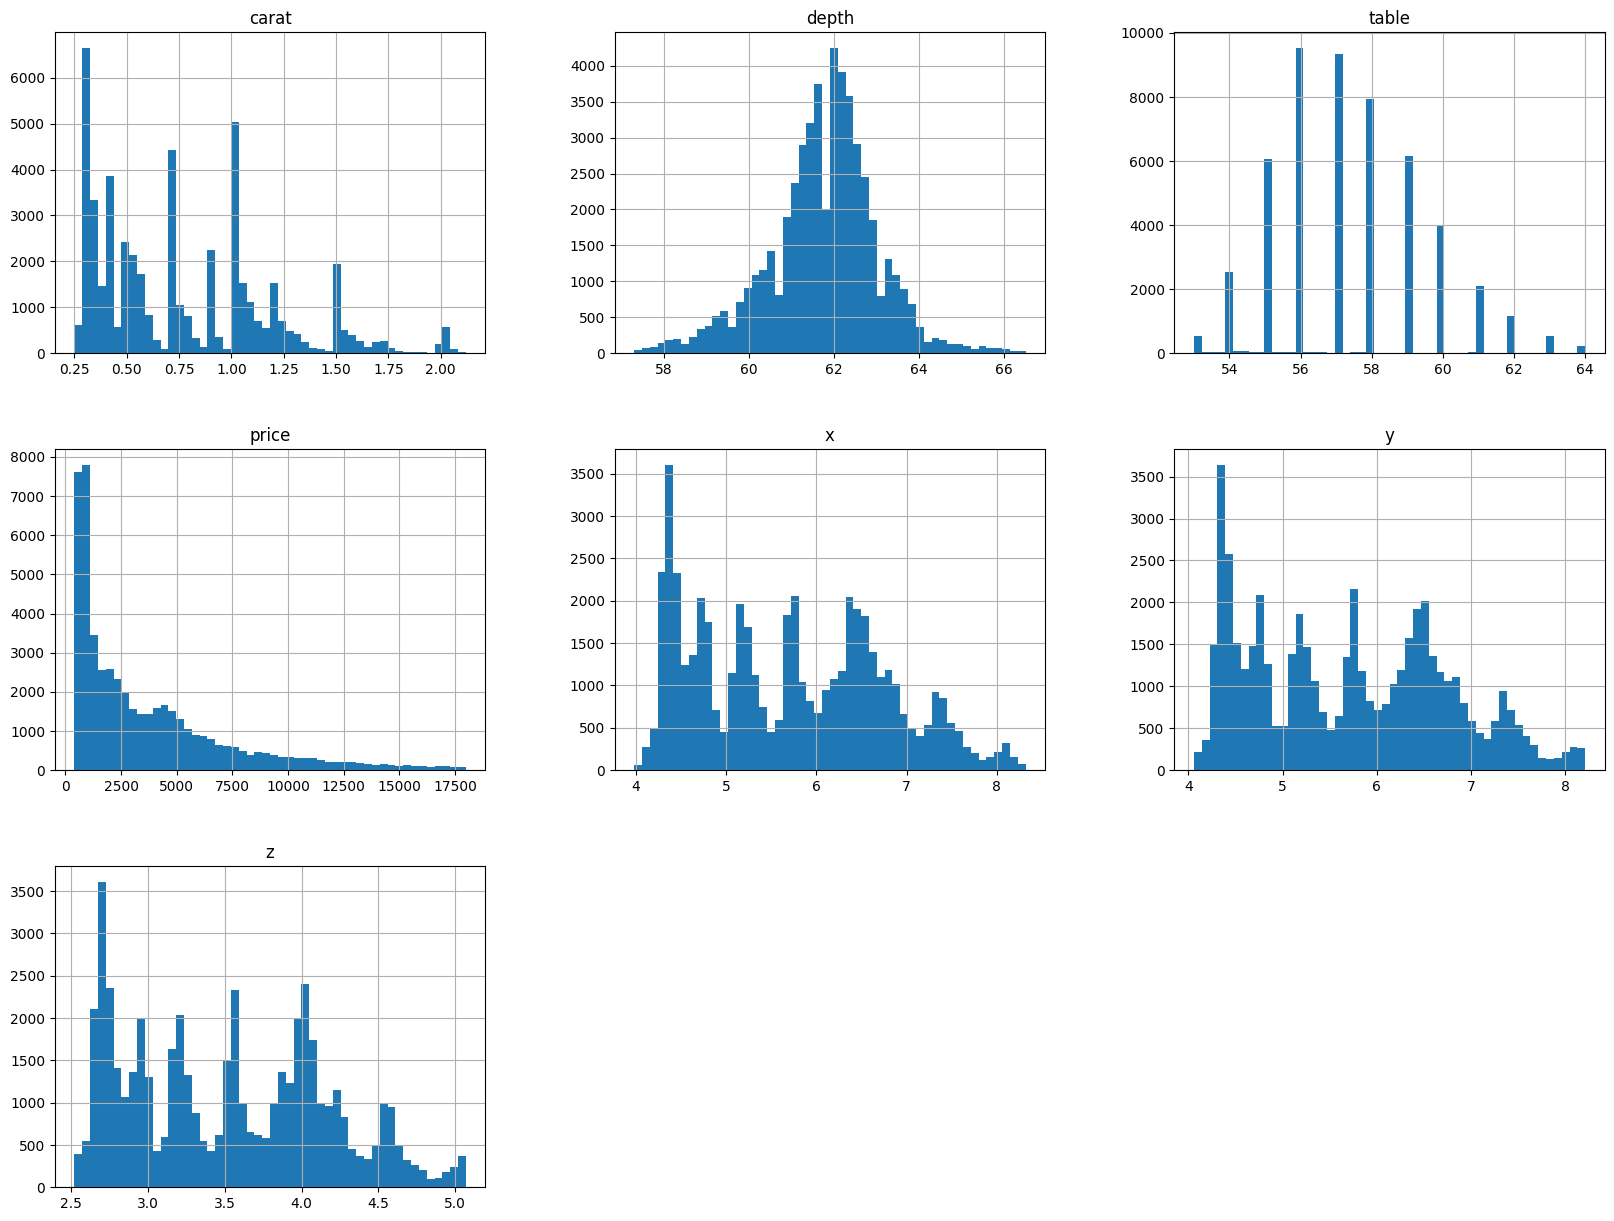

In [32]:
# after removing outlier

diamonds2 = diamonds.copy()

for col in diamonds2.columns:
    if diamonds2[col].dtype != 'object':
        diamonds2 = diamonds2[(diamonds2[col] >= np.percentile(diamonds2[col], 0.5)) &
                              (diamonds2[col] <= np.percentile(diamonds2[col], 99.5))]
        diamonds2.reset_index(drop=True, inplace=True)
        
diamonds2.shape

diamonds2.hist(bins=50, figsize=(20, 15))
plt.show()


/tmp/ipykernel_37178/3407704575.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diamonds2.corr(), annot=True)


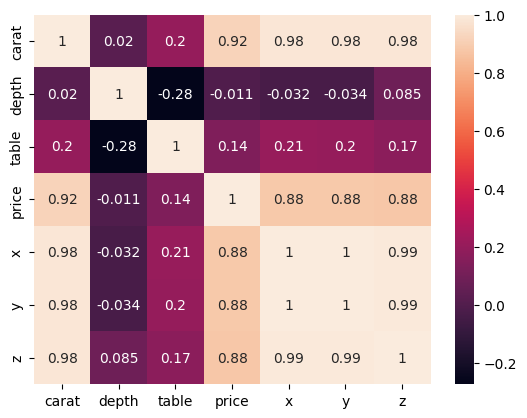

In [33]:
# check the correlation between the numerical variables

sns.heatmap(diamonds2.corr(), annot=True)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

# split data into training, validation, and test sets
train, test = train_test_split(diamonds, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.25, random_state=42)

In [41]:
# create a list of features
features = ['carat', 'cut', 'color', 'clarity', 'x', 'y','z','table', 'depth']
# create X matrix and y vector
X_train = train[features]
y_train = train['price']
X_val = val[features]
y_val = val['price']
X_test = test[features]
y_test = test['price']

In [42]:
# encode the categorical features
from sklearn.preprocessing import OrdinalEncoder

# create an ordinal encoder
encoder = OrdinalEncoder()

# encode the training data
X_train['cut'] = encoder.fit_transform(X_train[['cut']])
X_train['color'] = encoder.fit_transform(X_train[['color']])
X_train['clarity'] = encoder.fit_transform(X_train[['clarity']])

# encode the validation data
X_val['cut'] = encoder.fit_transform(X_val[['cut']])
X_val['color'] = encoder.fit_transform(X_val[['color']])
X_val['clarity'] = encoder.fit_transform(X_val[['clarity']])
X_test['cut'] = encoder.fit_transform(X_test[['cut']])
X_test['color'] = encoder.fit_transform(X_test[['color']])
X_test['clarity'] = encoder.fit_transform(X_test[['clarity']])

# check the data
X_train.head()

/tmp/ipykernel_37178/997753703.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cut'] = encoder.fit_transform(X_train[['cut']])
/tmp/ipykernel_37178/997753703.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['color'] = encoder.fit_transform(X_train[['color']])
/tmp/ipykernel_37178/997753703.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,carat,cut,color,clarity,x,y,z,table,depth
40286,0.30,2.0,3.0,5.0,4.29,4.33,2.68,54.0,62.2
4259,0.90,4.0,5.0,4.0,6.10,6.06,3.85,59.0,63.3
15763,1.21,2.0,4.0,5.0,6.80,6.75,4.26,57.0,62.9
48293,0.54,2.0,3.0,4.0,5.28,5.31,3.21,56.0,60.6
12586,1.31,3.0,5.0,2.0,7.01,6.98,4.34,58.0,62.0


In [43]:
# the decision tree model
from sklearn.tree import DecisionTreeRegressor

# create a decision tree model
# dt = DecisionTreeRegressor(random_state=42, max_depth=10)
dt = DecisionTreeRegressor(random_state=42, min_samples_leaf=6)

# fit the model
dt.fit(X_train, y_train)

# make predictions
y_pred = dt.predict(X_val)


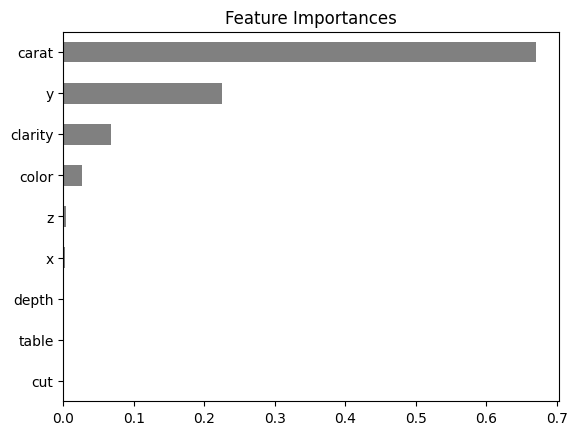

In [44]:
# show feature importances
importances = pd.Series(dt.feature_importances_, X_train.columns)

# plot feature importances
importances.sort_values().plot.barh(color='grey')
plt.title('Feature Importances')
plt.show()

In [45]:
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_0 <= 1.00
|   |--- feature_0 <= 0.61
|   |   |--- feature_5 <= 4.99
|   |   |   |--- feature_4 <= 4.62
|   |   |   |   |--- feature_4 <= 4.31
|   |   |   |   |   |--- feature_4 <= 4.20
|   |   |   |   |   |   |--- feature_3 <= 5.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 4.06
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 3.98
|   |   |   |   |   |   |   |   |   |   |--- value: [490.57]
|   |   |   |   |   |   |   |   |   |--- feature_4 >  3.98
|   |   |   |   |   |   |   |   |   |   |--- value: [547.50]
|   |   |   |   |   |   |   |   |--- feature_4 >  4.06
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 2.54
|   |   |   |   |   |   |   |   |   |   |   |--- value: [626.83]
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  2.54
|   |   |   |   |   |   |   |   |   |   |   |--- value: [778.62]
|   |   |   |   |   |   |   |   |   |--

In [46]:
# calculate metrics
metrics_train = metrics(y_train, dt.predict(X_train))
metrics_val = metrics(y_val, dt.predict(X_val))

print('Train MAE', metrics_train[0], 'Val MAE', metrics_val[0])
print('Train MAPE', metrics_train[1], 'Val MAPE', metrics_val[1])
print('Train MSE', metrics_train[2], 'Val MSE', metrics_val[2])
print('Train RMSE', metrics_train[3], 'Val RMSE', metrics_val[3])
print('Train R2', metrics_train[4], 'Val R2', metrics_val[4])


Train MAE 221.62358759835587 Val MAE 327.43294459037645
Train MAPE 0.05407203860659828 Val MAPE 0.07997434472710895
Train MSE 197185.75723490954 Val MSE 425948.23651135725
Train RMSE 444.0560293869565 Val RMSE 652.6470995196081
Train R2 0.9876969463228973 Val R2 0.9726836268065504


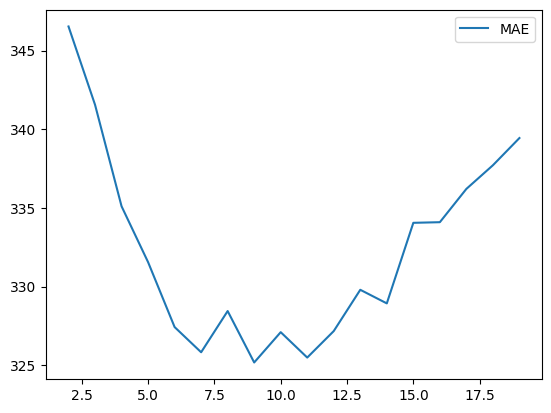

In [47]:
mae, mape, mse, rmse, r2 = [], [], [], [], []
for min_sample_leaf in range(2,20): 
    

    dt = DecisionTreeRegressor(random_state=42, min_samples_leaf=min_sample_leaf)
    dt.fit(X_train, y_train)
    metrics_train = metrics(y_train, dt.predict(X_train))
    metrics_val = metrics(y_val, dt.predict(X_val))
    mae.append(metrics_val[0])
    mape.append(metrics_val[1])
    mse.append(metrics_val[2])
    rmse.append(metrics_val[3])
    r2.append(metrics_val[4])


# plot metrics vs min_samples_leaf
plt.plot(range(2,20), mae, label='MAE')
plt.legend()
plt.show()

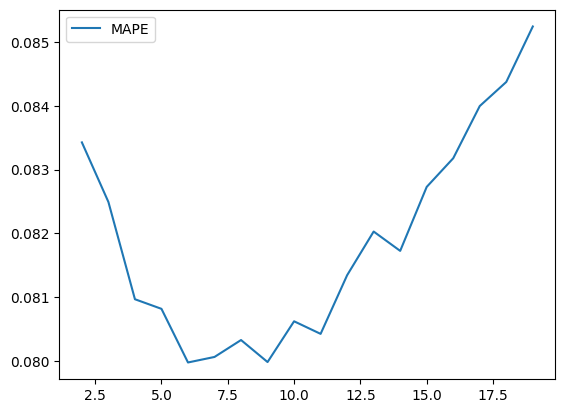

In [48]:
plt.plot(range(2,20), mape, label='MAPE')
plt.legend()
plt.show()

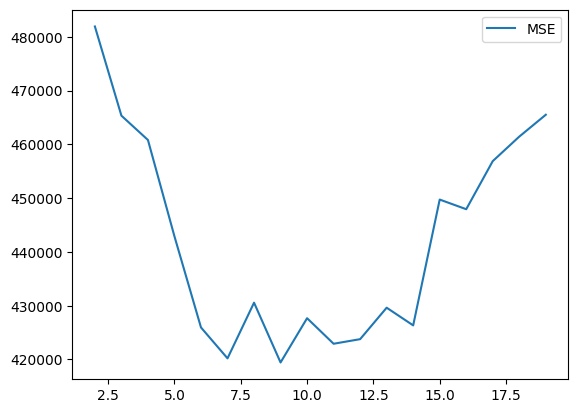

In [49]:
plt.plot(range(2,20), mse, label='MSE')
plt.legend()
plt.show()

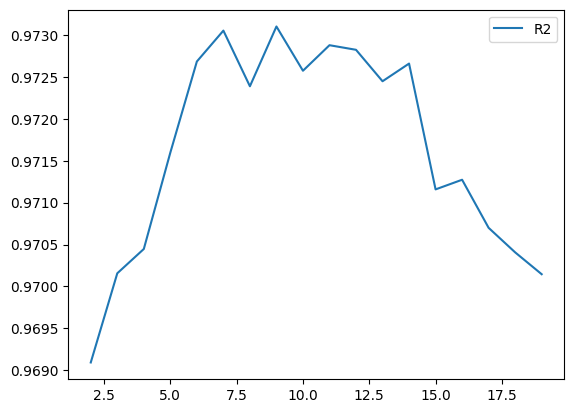

In [50]:
plt.plot(range(2,20), r2, label='R2')
plt.legend()
plt.show()

The standard practice is to use a greedy procedure, in which we iteratively grow the
tree one node at a time. This approach is used by CART [BFO84], C4.5, and ID3, which
are three popular implementations of the method.

To do : 
    deep_learning Resgres model  
    Các thuật toán train đã hội tụ chưa ? làm thế nào để cải thiện model ? 
    Độ quan trọng của các features 
    Lựa chọn tham số, so sánh đánh giá 

In [ ]:
# importance of features in the decision tree model
# so sánh kêt quả mô hình trước và sau khi loại bỏ các outlier
# thử loại bỏ các feature không quan trọng

True